##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [144]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



The purpose of my project is to research and analyze voter registaration trends in the United States in both a state and national level. My goal is to learn and understand trends in voter registration. This can be useful in the future for identifying areas where voter registration can be improved. Additionally, we can analyze cities with higher voter registration rates to compare their methods and apply their strategies to other locations. It is important to read this notebook to understand trends so we can apply this information in the future. We can take this information and apply it in the future by recognizing what areas need more encouragement for voter registration. My two research questions are:

1. How does national voter registration fluctuate by month, and which months consistently show the highest voter registration rates?

2. How has voter registration in Florida changed between the years 2016 and 2020, and what factors contributed to the change?


## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [145]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Jurisdiction refers to the state name. Year refers to what year the data was collected. Month refers to what month the data was collected. New registered voters refers to the amount of new voters in that spectic time period/place.

Check for any missing data data. (1 point)

In [146]:
voters.isnull().values.any()

False

Check your data types. (1 point)

In [147]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [148]:
voters = voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})

Explain any potential limitations to your data (2 points)

A large limitation I have noticed is that this dataset does not cover every state. It only includes 11 states and D.C. so the data is not fully represented country-wise. This can throw off our research question relating to a national trend. Another limitation I have noticed is the data only includes the years 2016 and 2020, which are presidental election years. While these are important, having the years inbetween can also help us get more insight.

One more limitation to consider is that looking at voter registration numbers rather than percentages can be misleading. States with larger populations will naturally have higher voter registration counts. For example, comparing California to Rhode Island would show a big difference in total registrations.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [149]:
voters.sort_values(by="registered_voters",ascending=False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


California in Feb 2020 had the highest amount of voter registration of 238281 voters.

What is the average voter registration? (1 points)

In [150]:
voters["registered_voters"].mean()

48223.46226415094

the average voter registration is 48,223.46 voters.

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [151]:
high_voters= voters[voters['registered_voters']>voters["registered_voters"].mean()]
high_voters.count()
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


This has happened 93 times.

How many times did each state go above the national average for new voter registration? (2 points)



In [152]:
high_voters.groupby('NAME').count()[["registered_voters"]]

,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


Arizona went over 3 times, California went over 7 times, Florida went over 7 times, Georgia went one time, Illinois went over 4 times, North Carolina went over 6, and Texas went over 8 times.

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [153]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


California, Texas, and Florida had the highest average voter registration overall.

##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

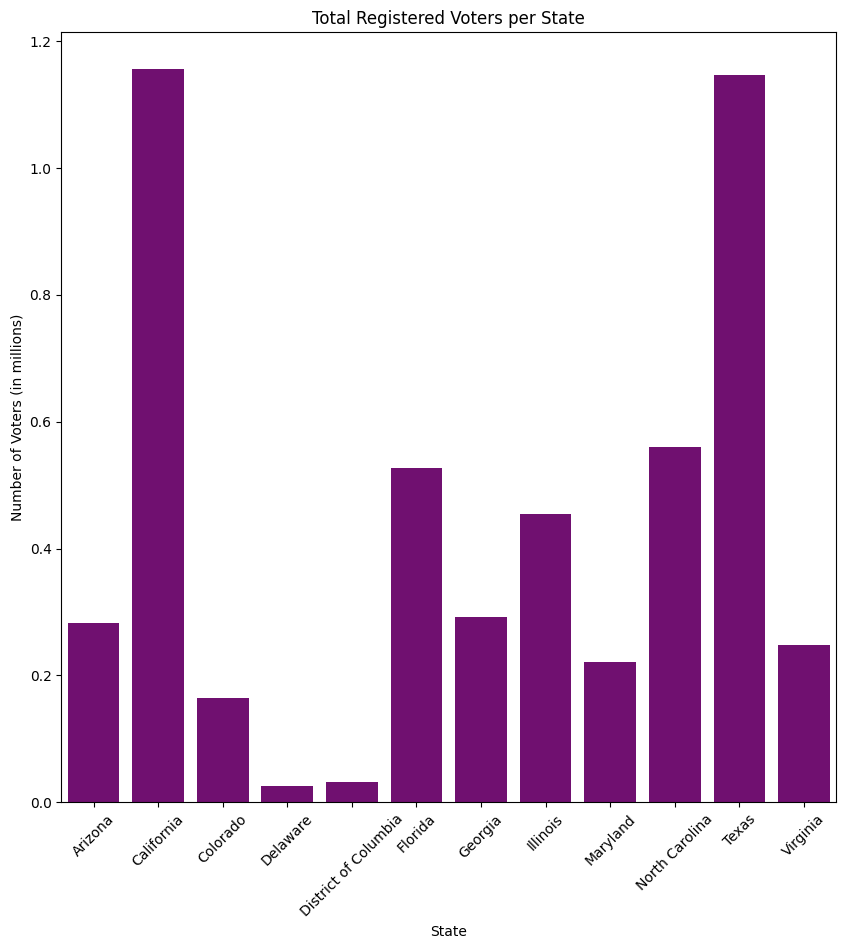

In [154]:
plt.figure(figsize=(10,10))
question1 = voters.groupby("NAME")["registered_voters"].sum() / 1e6
sns.barplot(question1, color = "purple")
plt.title("Total Registered Voters per State")
plt.xlabel("State")
plt.ylabel("Number of Voters (in millions)")
plt.xticks(rotation=45)
plt.show()

California and Texas have the largest amount of registered voters. Deleware and D.C. have the smallest amount.

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

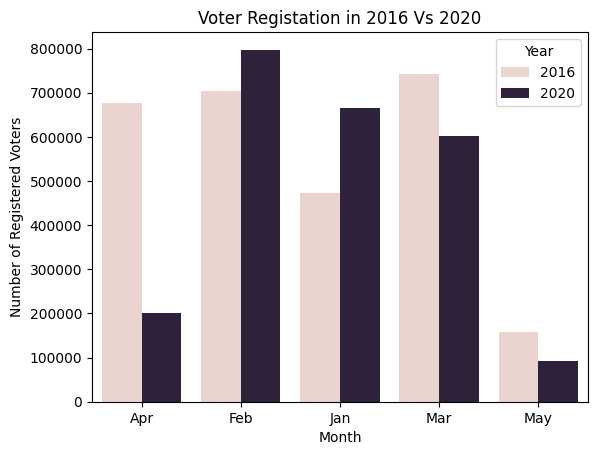

In [155]:
question2 = voters.groupby(["Year","Month"])["registered_voters"].sum().reset_index()
sns.barplot(question2, x="Month", y="registered_voters", hue= "Year")
plt.title("Voter Registation in 2016 Vs 2020")
plt.xlabel("Month")
plt.ylabel("Number of Registered Voters")
plt.show()

Voter registration was the highest in March in 2016 while was the highest in Feburary in 2020. It was the lowest in both years in May.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

My research question:

How has voter registration in Florida changed between the years 2016 and 2020, and what factors contributed to the change?






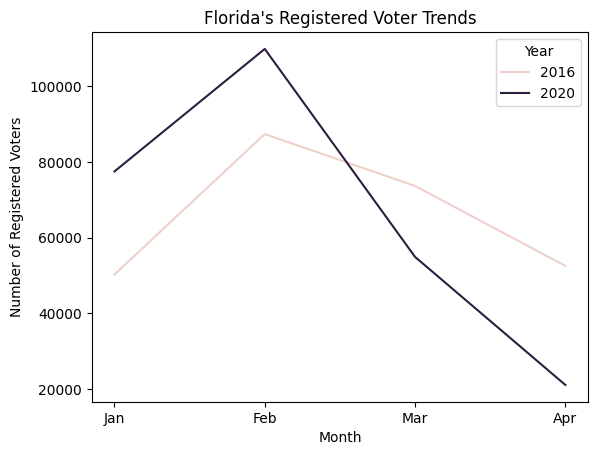

In [156]:
question3=voters[voters['NAME']=='Florida']
sns.lineplot(question3, x="Month", y="registered_voters", hue= "Year")
plt.xlabel("Month")
plt.ylabel("Number of Registered Voters")
plt.title("Florida's Registered Voter Trends")
plt.show()

It appears that voter registration has peaked in 2020 between the months of January-Febuary. Halfway through, registration was higher in 2016 from middle of Febuary to April. Florida's registation peak was Feburary of 2020 of about 110,000 registered voters. To find out what factors lead to this change, we would need to research what ways Florida has increased voter participation, possibly through people and advertisements. In both graphs, registration peaked in Feburary.


##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [157]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [158]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

<Axes: >

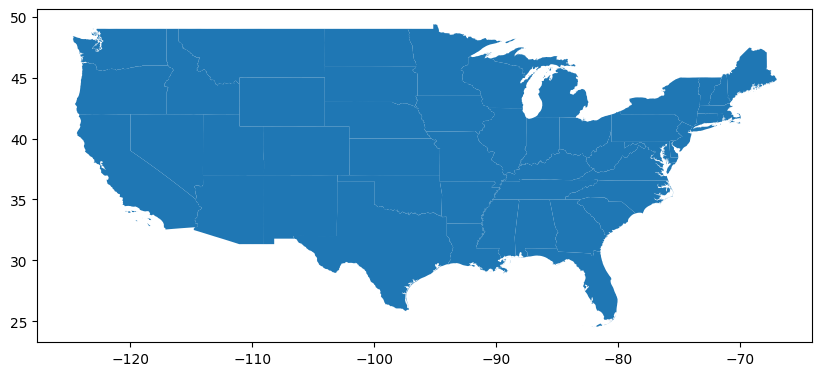

In [159]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))

Create a dataframe that shows the average voter registration per state. (2 points)

In [160]:
average = voters.groupby(["NAME"])["registered_voters"].mean().reset_index()
average

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [161]:
merge1 = bbox.merge(average, on="NAME", how="inner")
merge1

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

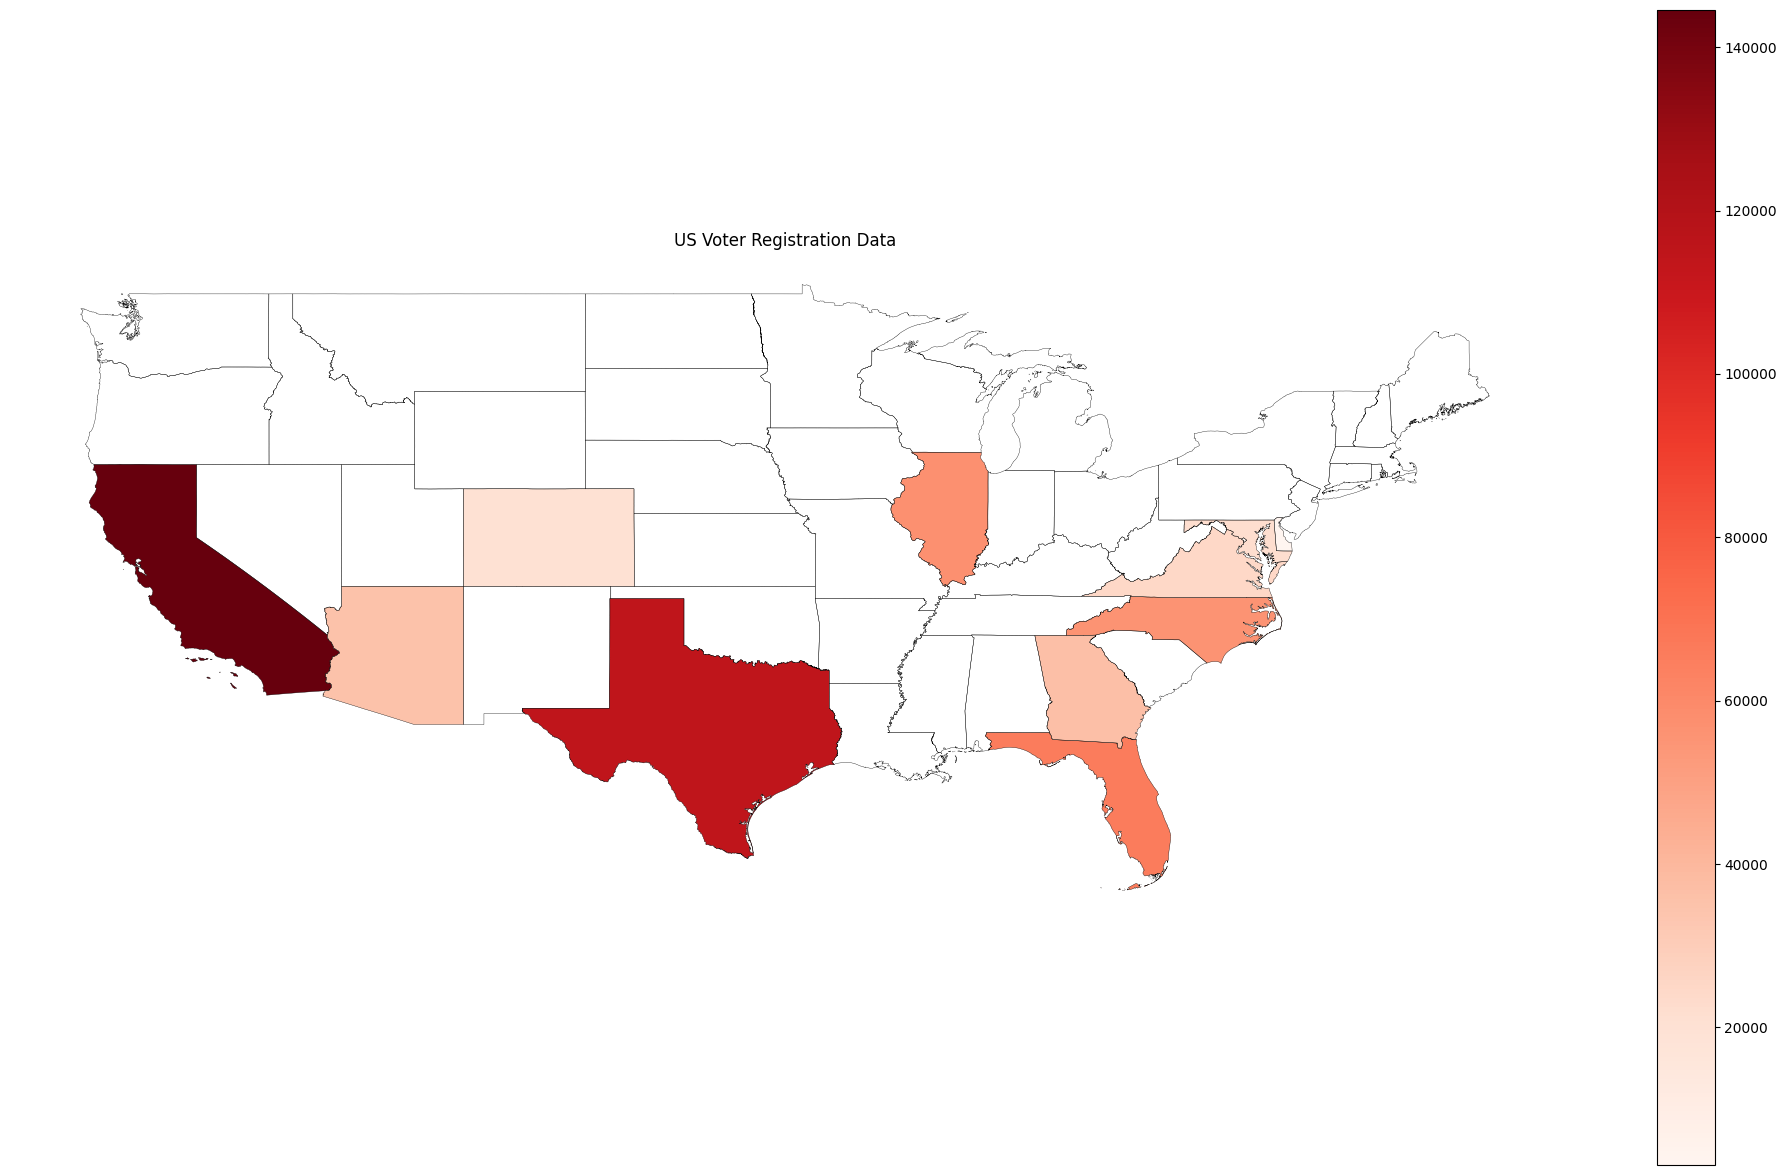

In [162]:
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()
bbox.boundary.plot(ax=ax, linewidth=0.25, color="black")
merge1.plot(column="registered_voters", ax=ax, legend=True, cmap="Reds")
plt.title("US Voter Registration Data")
ax.set_axis_off()
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


From studying this dataset, seeing trends in voter registration will be helpful for the future. We were able to find which states have high voter turnout and use it in the future. States like California and Texas have the highest amount while Maryland and Delaware have the lowest. We were also able to study and compare voter registration between 2016 and 2020. Voter regestration seems to be increasing from 2016 to 2020, so its good to see that voter participation is increasing overall.

A suggestion that I will include is to study a dataset with all 50 states to get more precise data. I also will suggest to find a dataset with infromation for the years between 2016 and 2020 to see how the election effects voter registration. I think this dataset is helpful, however some more data would help for more analyzing. I would also suggest to my client that they take this information and find the states that have a lower voter participation and make change on it. They should act upon the data and research how to increase the smaller state's rates with voter registration. Also, this data can be slighly off because looking at just numbers in perpective to state's size might be an issue. Perhaps looking at data with population percentages rater than totals would be more accurate.

To continue this data, I would add more states to the dataset, so we have the complete country's data. If this is not possible, I would also make more indept charts like a box plot to find any outliers in the data that we have. We can take the lower outliers and spread more awareness to increase voter participation.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

[Github Link](https://github.com/kaitlyncapone1/325-Midterm)

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Kaitlyn Capone